In [ ]:
# ライブラリのインストール（必要に応じて）
!pip install networkx matplotlib pandas

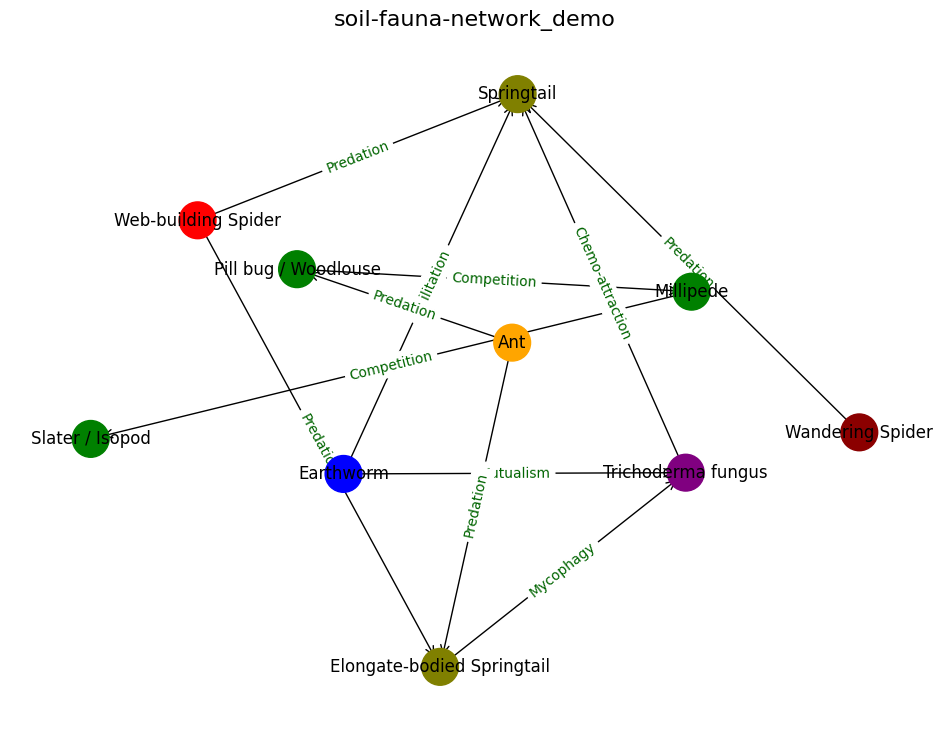

In [12]:
# ライブラリ読み込み
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# species.csv と interaction.csv の読み込み
species_df = pd.read_csv("species.csv")
interaction_df = pd.read_csv("interaction.csv")

# ネットワーク初期化（有向グラフ）
G = nx.DiGraph()

# ノード追加：IDとラベル・機能的役割を属性に持たせる
for _, row in species_df.iterrows():
    G.add_node(row["id"], label=row["common_name"], role=row["functional_role"])

# エッジ追加：source_id → target_id にラベル（relation_type）を付与
for _, row in interaction_df.iterrows():
    G.add_edge(row["source_id"], row["target_id"], label=row["relation_type_en"])

# ノードの色分け（role別に簡易マッピング）
role_colors = {
    "分解者": "green",
    "分解者／菌食": "olive",
    "捕食者／エンジニア": "orange",
    "捕食者（網）": "red",
    "捕食者（徘徊）": "darkred",
    "土壌改良者": "blue",
    "菌類（分解・共生）": "purple"
}
node_colors = [role_colors.get(G.nodes[n]["role"], "gray") for n in G.nodes]

# 描画（spring_layoutで自然配置）
# plt.figure(figsize=(10, 8))
plt.figure(figsize=(12, 9))
# pos = nx.spring_layout(G, seed=42)
pos = nx.spring_layout(G, k=1.6, seed=42)
# ノード描画
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
nx.draw_networkx_labels(G, pos, labels={n: G.nodes[n]["label"] for n in G.nodes})
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): G[u][v]["label"] for u, v in G.edges},font_color="darkgreen")

plt.title("soil-fauna-network_demo", fontsize=16)
plt.axis("off")
plt.show()
